# THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP JUNE-2021
## Submitted By : Megha Verma

# Task 1 - Predicting the student's percentage

Prediction is done using Supervised Machine Learning Technique - Simple Linear Regression

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 1) Understanding the dataset

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking for null values

data.isna().sum()

Hours     0
Scores    0
dtype: int64

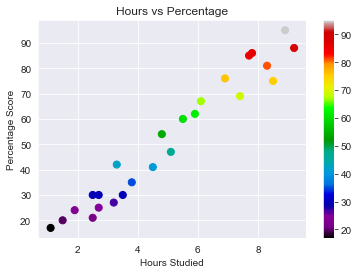

In [6]:
# Plotting the distribution of scores
plt.scatter(x = data['Hours'], y=data['Scores'], s = 50, c=data['Scores'], cmap='nipy_spectral' )
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.colorbar()
plt.show()

From the graph plotted above we can clearly see the positive linear relation between No of hours studied and Percentage score

# 2) Checking the correlation

In [7]:
correlation = data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

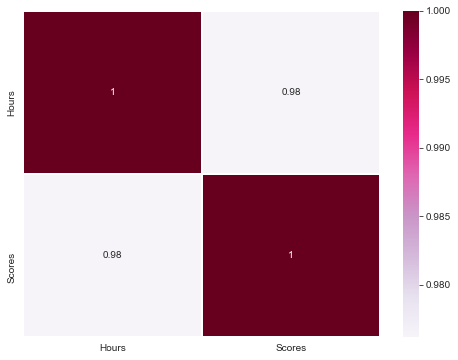

In [8]:
colormap = plt.cm.PuRd
plt.figure(figsize=(8,6))
sns.heatmap(correlation,cmap=colormap ,annot = True ,linewidth = 0.8)

# 3) Training & Testing the model

In [9]:
X = data.drop("Scores",axis=1) #all feature variables
y = data["Scores"] #only target variable

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size=0.3,random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Model Trained")

Model Trained


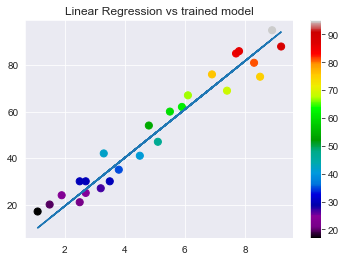

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y, c=y, s=50, cmap='nipy_spectral')
plt.title('Linear Regression vs trained model')
plt.plot(X, line)
plt.colorbar()
plt.show()

# 4) Predicting the values

In [13]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


In [15]:
import sklearn.metrics as sm

print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 

R2 score = 0.89
Mean absolute error = 7.17
Mean squared error = 56.09
Median absolute error = 6.44
Explain variance score = 0.91


In [16]:
Xnb=[[9.25]]
y_pred_nb=regressor.predict(Xnb)
print(y_pred_nb[0])

94.78722212956563


So the prdeicted score of student who studies 9.25hrs/day is 94.7872